In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torchvision import datasets, transforms
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [2]:
PATH = './FashionMNIST'

In [3]:
ds = datasets.FashionMNIST(PATH, download=True)

In [4]:
data = ds.train_data.view(-1).float() / 255
m = data.mean()
s = data.std()
m, s 

(tensor(0.2860), tensor(0.3530))

In [5]:
tfms = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((m,), (s,))
])

In [6]:
train_ds = datasets.FashionMNIST(PATH, transform=tfms, download=True, train=True)
test_ds = datasets.FashionMNIST(PATH, transform=tfms, download=True, train=False)

In [7]:
train_loader = DataLoader(train_ds, batch_size=10)
test_loader = DataLoader(test_ds, batch_size=10)

In [8]:
class Net(nn.Module):
    def __init__(self, lr=1e-4, l2=0.):
        super(Net, self).__init__()
        self.fc1 = nn.Linear(28*28, 1024)
        self.fc2 = nn.Linear(1024, 1024)
        self.fc3 = nn.Linear(1024, 1024)
        self.fc4 = nn.Linear(1024, 10)
        self.optim = optim.Adam(self.parameters(), lr=lr, weight_decay=l2)
        
    def forward(self, x):
        x = x.view(-1, 28*28)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = F.relu(self.fc3(x))
        x = self.fc4(x)
        x = F.log_softmax(x, dim=1)
        return x
    
    def loss(self, output, target, **kwargs):
        self._loss = F.nll_loss(output, target, **kwargs)
        return self._loss

In [9]:
def train(epoch, model):
    train_size = len(train_loader.sampler)
    for batch_idx, (data, target) in enumerate(train_loader):
        model.optim.zero_grad()
        output = model(data.cuda())
        loss = model.loss(output, target.cuda())
        loss.backward()
        model.optim.step()   
    else:
        batch_idx += 1
        line = 'Train Epoch: {} [{}/{} ({:.0f}%)]\tLoss  {:.6f}'.format(
            epoch, batch_idx * len(data), train_size, 100. * batch_idx / len(train_loader), model._loss.item())
        print(line)
    return model._loss.item()

In [10]:
def test(model, loader, ds):
    test_size = len(loader.sampler)
    avg_lambda = lambda l: 'Loss: {:.4f}'.format(l)
    acc_lambda = lambda c, p: 'Accuracy: {}/{} ({:.0f}%)'.format(c, test_size, p)
    line = lambda l, c, p: ' ' + avg_lambda(l) + '\t' + acc_lambda(c, p)

    test_loss = 0
    correct = 0
    with torch.no_grad():
        for data, target in loader:
            data = data.cuda()
            target = target.cuda()
            output = model(data)
            test_loss += model.loss(output, target, size_average=False).item() # sum up batch loss
            _, pred = torch.max(output.data, 1)
            correct += (pred == target).sum().item()
    
    test_loss /= test_size
    correct_pct = correct / test_size
    report = ''+ds+' set:\n' + line(test_loss, correct, 100.0 * correct_pct) + '\n'
    
    print(report)
    return test_loss, correct_pct

In [11]:
def plot():
    plt.plot(tst_losses, color='green', label="test")
    plt.plot(trn_losses, color='blue', label="train")
    plt.ylabel("loss")
    plt.xlabel("epochs")
    plt.legend()
    plt.show()
    plt.plot(tst_accuracy, color='green', label="test")
    plt.plot(trn_accuracy, color='blue', label="train")
    plt.ylabel("accuracy")
    plt.xlabel("epochs")
    plt.legend()
    plt.show()

Train Epoch: 1 [60000/60000 (100%)]	Loss  0.172377
Test set:
 Loss: 0.4069	Accuracy: 8483/10000 (85%)

Train set:
 Loss: 0.3530	Accuracy: 52041/60000 (87%)

Train Epoch: 2 [60000/60000 (100%)]	Loss  0.157819
Test set:
 Loss: 0.3697	Accuracy: 8656/10000 (87%)

Train set:
 Loss: 0.2957	Accuracy: 53227/60000 (89%)

Train Epoch: 3 [60000/60000 (100%)]	Loss  0.112159
Test set:
 Loss: 0.3610	Accuracy: 8740/10000 (87%)

Train set:
 Loss: 0.2644	Accuracy: 53922/60000 (90%)

Train Epoch: 4 [60000/60000 (100%)]	Loss  0.095380
Test set:
 Loss: 0.3612	Accuracy: 8787/10000 (88%)

Train set:
 Loss: 0.2445	Accuracy: 54307/60000 (91%)

Train Epoch: 5 [60000/60000 (100%)]	Loss  0.062152
Test set:
 Loss: 0.3809	Accuracy: 8771/10000 (88%)

Train set:
 Loss: 0.2391	Accuracy: 54493/60000 (91%)

Train Epoch: 6 [60000/60000 (100%)]	Loss  0.079853
Test set:
 Loss: 0.3983	Accuracy: 8808/10000 (88%)

Train set:
 Loss: 0.2199	Accuracy: 54993/60000 (92%)

Train Epoch: 7 [60000/60000 (100%)]	Loss  0.054255
Test se

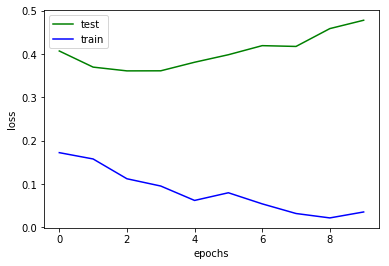

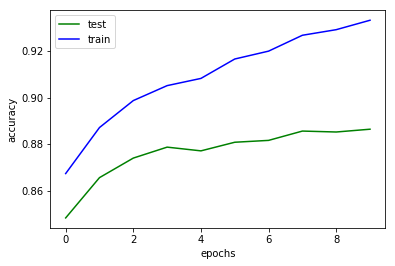

Train Epoch: 11 [60000/60000 (100%)]	Loss  0.011770
Test set:
 Loss: 0.5313	Accuracy: 8803/10000 (88%)

Train set:
 Loss: 0.2160	Accuracy: 55590/60000 (93%)

Train Epoch: 12 [60000/60000 (100%)]	Loss  0.013228
Test set:
 Loss: 0.5156	Accuracy: 8885/10000 (89%)

Train set:
 Loss: 0.1810	Accuracy: 56109/60000 (94%)

Train Epoch: 13 [60000/60000 (100%)]	Loss  0.011548
Test set:
 Loss: 0.5220	Accuracy: 8898/10000 (89%)

Train set:
 Loss: 0.1598	Accuracy: 56499/60000 (94%)

Train Epoch: 14 [60000/60000 (100%)]	Loss  0.004286
Test set:
 Loss: 0.5777	Accuracy: 8854/10000 (89%)

Train set:
 Loss: 0.1851	Accuracy: 56283/60000 (94%)

Train Epoch: 15 [60000/60000 (100%)]	Loss  0.000796
Test set:
 Loss: 0.6181	Accuracy: 8840/10000 (88%)

Train set:
 Loss: 0.1831	Accuracy: 56351/60000 (94%)

Train Epoch: 16 [60000/60000 (100%)]	Loss  0.001970
Test set:
 Loss: 0.6711	Accuracy: 8841/10000 (88%)

Train set:
 Loss: 0.1957	Accuracy: 56562/60000 (94%)

Train Epoch: 17 [60000/60000 (100%)]	Loss  0.000902


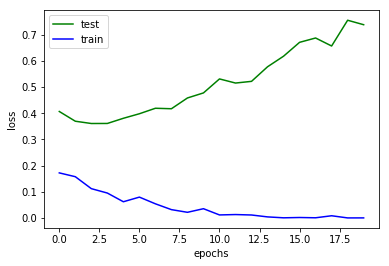

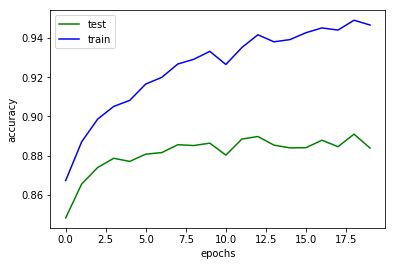

Train Epoch: 21 [60000/60000 (100%)]	Loss  0.001482
Test set:
 Loss: 0.7108	Accuracy: 8864/10000 (89%)

Train set:
 Loss: 0.1686	Accuracy: 56920/60000 (95%)

Train Epoch: 22 [60000/60000 (100%)]	Loss  0.000018
Test set:
 Loss: 0.8019	Accuracy: 8854/10000 (89%)

Train set:
 Loss: 0.1900	Accuracy: 56702/60000 (95%)

Train Epoch: 23 [60000/60000 (100%)]	Loss  0.000056
Test set:
 Loss: 0.7361	Accuracy: 8881/10000 (89%)

Train set:
 Loss: 0.1529	Accuracy: 57145/60000 (95%)

Train Epoch: 24 [60000/60000 (100%)]	Loss  0.000132
Test set:
 Loss: 0.8754	Accuracy: 8872/10000 (89%)

Train set:
 Loss: 0.1781	Accuracy: 57150/60000 (95%)

Train Epoch: 25 [60000/60000 (100%)]	Loss  0.000027
Test set:
 Loss: 0.8261	Accuracy: 8866/10000 (89%)

Train set:
 Loss: 0.1766	Accuracy: 57146/60000 (95%)

Train Epoch: 26 [60000/60000 (100%)]	Loss  0.000048
Test set:
 Loss: 0.9024	Accuracy: 8856/10000 (89%)

Train set:
 Loss: 0.1843	Accuracy: 57194/60000 (95%)

Train Epoch: 27 [60000/60000 (100%)]	Loss  0.000990


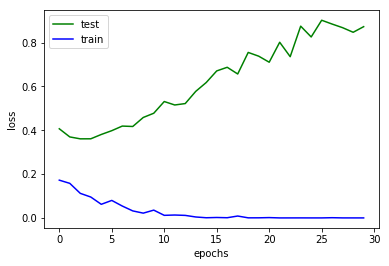

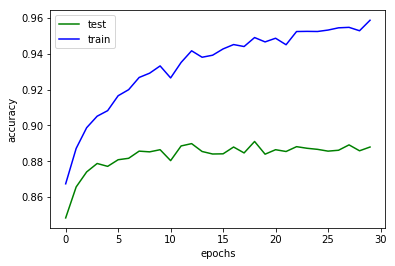

Train Epoch: 31 [60000/60000 (100%)]	Loss  0.000014
Test set:
 Loss: 0.9110	Accuracy: 8882/10000 (89%)

Train set:
 Loss: 0.1562	Accuracy: 57460/60000 (96%)

Train Epoch: 32 [60000/60000 (100%)]	Loss  0.000064
Test set:
 Loss: 0.9591	Accuracy: 8894/10000 (89%)

Train set:
 Loss: 0.1401	Accuracy: 57752/60000 (96%)

Train Epoch: 33 [60000/60000 (100%)]	Loss  0.000002
Test set:
 Loss: 0.9533	Accuracy: 8928/10000 (89%)

Train set:
 Loss: 0.1220	Accuracy: 57942/60000 (97%)

Train Epoch: 34 [60000/60000 (100%)]	Loss  0.002155
Test set:
 Loss: 0.9790	Accuracy: 8838/10000 (88%)

Train set:
 Loss: 0.1701	Accuracy: 57164/60000 (95%)

Train Epoch: 35 [60000/60000 (100%)]	Loss  0.000001
Test set:
 Loss: 0.9921	Accuracy: 8861/10000 (89%)

Train set:
 Loss: 0.1564	Accuracy: 57525/60000 (96%)

Train Epoch: 36 [60000/60000 (100%)]	Loss  0.000114
Test set:
 Loss: 1.0713	Accuracy: 8862/10000 (89%)

Train set:
 Loss: 0.1744	Accuracy: 57592/60000 (96%)

Train Epoch: 37 [60000/60000 (100%)]	Loss  0.000741


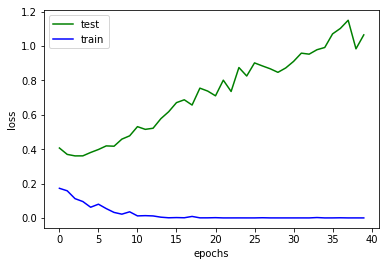

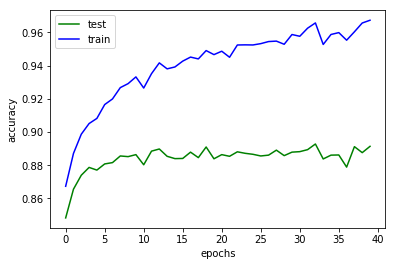

Train Epoch: 41 [60000/60000 (100%)]	Loss  0.000462
Test set:
 Loss: 1.0664	Accuracy: 8859/10000 (89%)

Train set:
 Loss: 0.1356	Accuracy: 57972/60000 (97%)

Train Epoch: 42 [60000/60000 (100%)]	Loss  0.000151
Test set:
 Loss: 1.0451	Accuracy: 8877/10000 (89%)

Train set:
 Loss: 0.1100	Accuracy: 58036/60000 (97%)

Train Epoch: 43 [60000/60000 (100%)]	Loss  0.000998
Test set:
 Loss: 1.0478	Accuracy: 8850/10000 (88%)

Train set:
 Loss: 0.1456	Accuracy: 57687/60000 (96%)

Train Epoch: 44 [60000/60000 (100%)]	Loss  0.002636
Test set:
 Loss: 1.1636	Accuracy: 8833/10000 (88%)

Train set:
 Loss: 0.1926	Accuracy: 57211/60000 (95%)

Train Epoch: 45 [60000/60000 (100%)]	Loss  0.000060
Test set:
 Loss: 1.2470	Accuracy: 8875/10000 (89%)

Train set:
 Loss: 0.1439	Accuracy: 57957/60000 (97%)

Train Epoch: 46 [60000/60000 (100%)]	Loss  0.000241
Test set:
 Loss: 1.2447	Accuracy: 8836/10000 (88%)

Train set:
 Loss: 0.1459	Accuracy: 57927/60000 (97%)

Train Epoch: 47 [60000/60000 (100%)]	Loss  0.039978


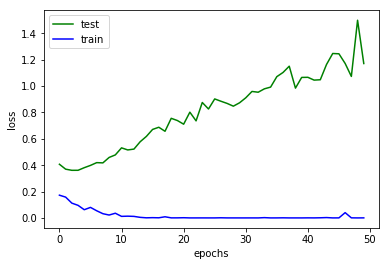

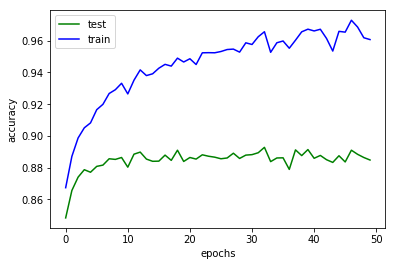

In [12]:
trn_losses = []
tst_losses = []
tst_accuracy = []
trn_accuracy = []
with torch.cuda.device(6) as d:
    model = Net().cuda()
    for epoch in range(1, 51):
        model.train()
        l = train(epoch, model)
        trn_losses.append(l)
        model.eval()
        l, a = test(model, test_loader, 'Test')
        tst_losses.append(l)
        tst_accuracy.append(a)
        _, a = test(model, train_loader, 'Train')
        trn_accuracy.append(a)
        if epoch % 10 == 0:
            plot()
        

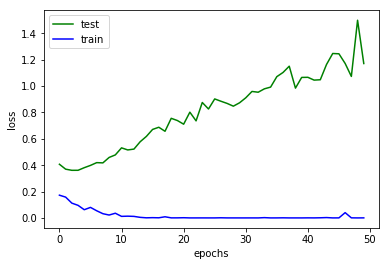

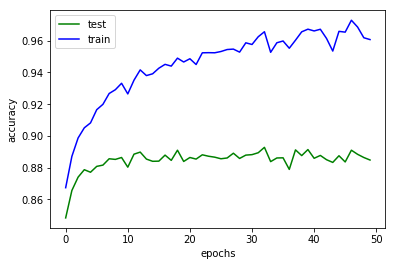

In [13]:
plot()